In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df_defender = pd.read_csv('../../data/Stats_csv/Defender_stats.csv')
df_defender

,Name,Nationality,Date of Birth,Height,Club,Position,Appearances,Wins,Losses,Clean sheets,...,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Goals,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork
0,Aaron Anselmino,Argentina,29/04/2005,188cm,NaN,Defender,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Aaron Cresswell,England,15/12/1989 (34),170cm,West Ham United,Defender,4,3,1,0.0,...,2,1,0,1,0,0,0,0,0,0
2,Aaron Hickey,Scotland,10/06/2002 (22),178cm,Brentford,Defender,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Aaron Keto-Diyawa,England,11/09/2003,NaN,NaN,Defender,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Aaron Wan-Bissaka,England,26/11/1997 (27),183cm,West Ham United,Defender,11,4,4,1.0,...,10,0,0,9,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Zak Sturge,England,15/06/2004,NaN,NaN,Defender,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
316,Zane Monlouis,Jamaica,16/10/2003 (21),185cm,Arsenal,Defender,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
317,Zanka,Denmark,23/04/1990,191cm,NaN,Defender,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
318,Álex Moreno,Spain,08/06/1993 (31),179cm,Nottingham Forest,Defender,9,4,3,1.0,...,6,2,0,11,0,0,0,0,0,0


In [20]:
df_defender.isnull().sum()

Name                        0
Nationality                 0
Date of Birth               1
Height                     32
Club                      133
Position                    0
Appearances                 0
Wins                        0
Losses                      0
Clean sheets                1
Goals Conceded              1
Tackles                     0
Tackle success %            0
Last man tackles            1
Blocked shots               0
Interceptions               0
Clearances                  0
Headed Clearance            0
Clearances off line         1
Recoveries                  0
Duels won                   0
Duels lost                  0
Successful 50/50s           0
Aerial battles won          0
Aerial battles lost         0
Own goals                   1
Errors leading to goal      0
Assists                     0
Passes                      0
Passes per match            0
Big Chances Created         0
Crosses                     0
Cross accuracy %            0
Through ba

Processing

In [21]:
def processing_data(df):
    # Sắp xếp theo cột 'Appearances' (nếu cần) và loại bỏ các dòng trùng lặp theo 'Name'
    df = df.sort_values(by='Appearances', ascending=False)
    df = df.drop_duplicates(subset=['Name'], keep='last')
    
    # Xóa các dòng có giá trị NaN
    df = df.dropna()
    
    # Chuẩn hóa cột 'Date of Birth'
    def std_date_of_birth(date):
        try:
            return date.split(" ")[0]
        except AttributeError:  # Xử lý lỗi nếu giá trị không phải chuỗi
            return date
    
    # Chuẩn hóa cột 'Height'
    def std_height(height):
        try:
            return float(height.split("c")[0]) if isinstance(height, str) else height
        except ValueError:  # Xử lý lỗi nếu giá trị không thể chuyển thành số
            return height
    def std_Passes(Passes):
        try:
            return int(''.join(Passes.split(','))) if isinstance(Passes,str) else Passes
        except ValueError:
            return Passes
    df['Passes'] = df['Passes'].apply(std_Passes)
    df['Date of Birth'] = df['Date of Birth'].apply(std_date_of_birth)
    df['Height'] = df['Height'].apply(std_height)
    
    return df


In [22]:
df_defender = processing_data(df_defender)

In [23]:
df_defender

,Name,Nationality,Date of Birth,Height,Club,Position,Appearances,Wins,Losses,Clean sheets,...,Accurate long balls,Yellow cards,Red cards,Fouls,Offsides,Goals,Headed goals,Goals with right foot,Goals with left foot,Hit woodwork
275,Taylor Harwood-Bellis,England,30/01/2002,188.0,Southampton,Defender,13,1,10,1.0,...,30,5,0,13,0,1,1,0,0,0
183,Lewis Hall,England,08/09/2004,179.0,Newcastle United,Defender,13,5,4,2.0,...,30,3,0,5,0,0,0,0,0,0
203,Marc Guéhi,England,13/07/2000,182.0,Crystal Palace,Defender,13,1,6,2.0,...,61,2,0,6,0,2,0,1,1,0
89,Gabriel Magalhães,Brazil,19/12/1997,190.0,Arsenal,Defender,13,6,2,4.0,...,27,1,0,9,0,3,3,0,0,0
248,Rayan Aït-Nouri,Algeria,06/06/2001,180.0,Wolverhampton Wanderers,Defender,12,2,7,0.0,...,8,4,0,17,1,3,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Zane Monlouis,Jamaica,16/10/2003,185.0,Arsenal,Defender,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
280,Thierry Katsukunya,Wales,30/11/2005,180.0,Aston Villa U19,Defender,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
90,Garang Kuol,Australia,15/09/2004,175.0,Newcastle United,Defender,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
21,Bastien Meupiyou,France,19/03/2006,191.0,Wolverhampton Wanderers,Defender,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_defender.columns

Index(['Name', 'Nationality', 'Date of Birth', 'Height', 'Club', 'Position',
       'Appearances', 'Wins', 'Losses', 'Clean sheets', 'Goals Conceded',
       'Tackles', 'Tackle success %', 'Last man tackles', 'Blocked shots',
       'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Assists', 'Passes',
       'Passes per match', 'Big Chances Created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls',
       'Yellow cards', 'Red cards', 'Fouls', 'Offsides', 'Goals',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Hit woodwork'],
      dtype='object')

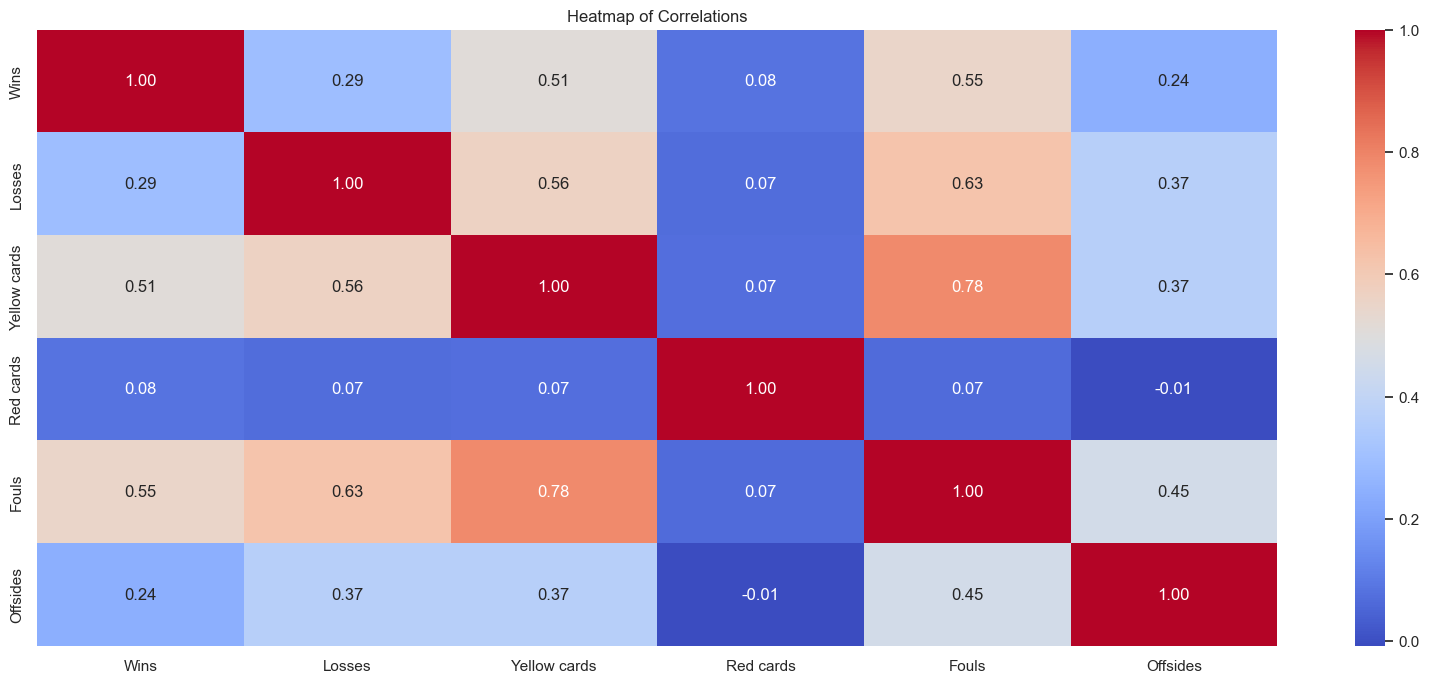

In [25]:
corr_matrix = df_defender.select_dtypes(include=['float64', 'int64'])[['Wins', 'Losses', 'Yellow cards', 'Red cards', 'Fouls', 'Offsides']].corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0)
plt.title('Heatmap of Correlations')
plt.show()

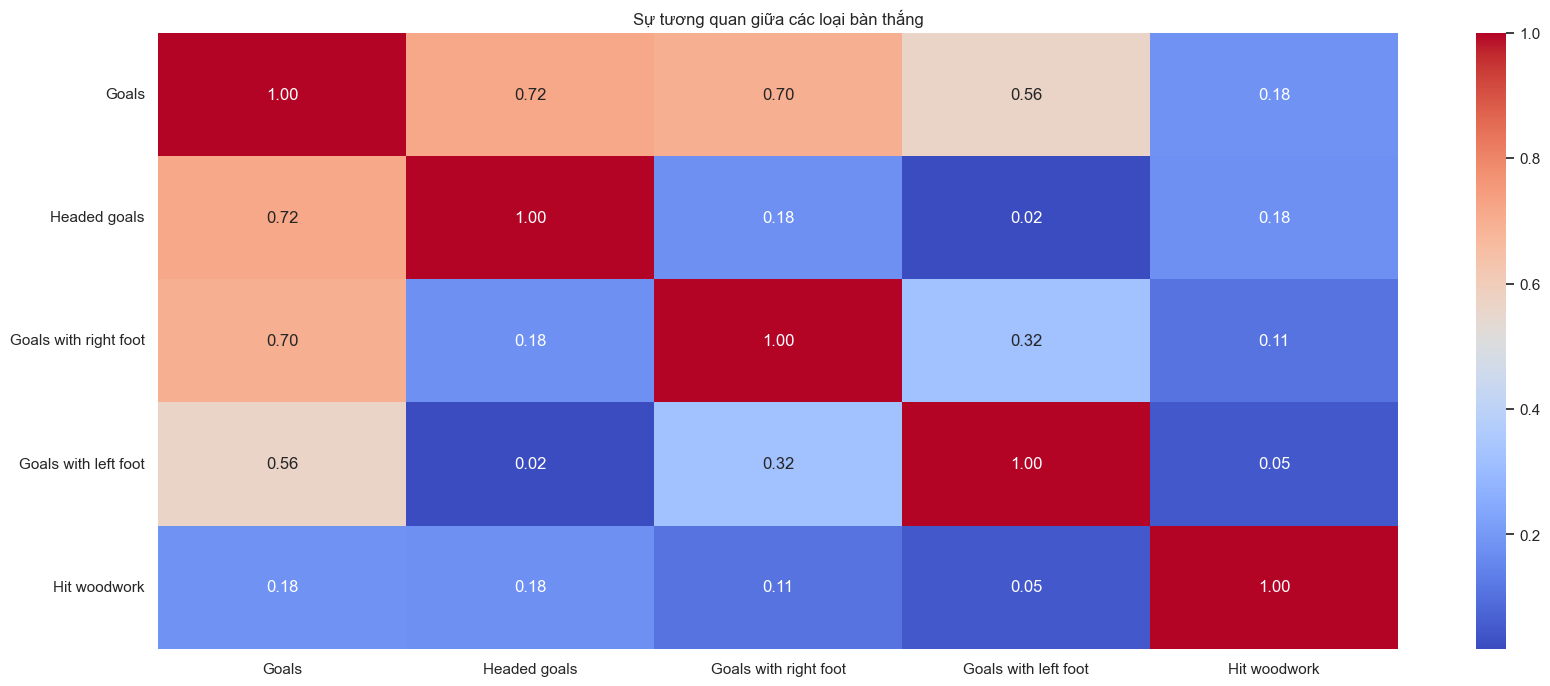

In [26]:
corr_matrix = df_defender.select_dtypes(include=['float64', 'int64'])[['Goals', 'Headed goals', 'Goals with right foot', 'Goals with left foot', 'Hit woodwork']].corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0)
plt.title('Sự tương quan giữa các loại bàn thắng')
plt.show()

Top 10 cầu thủ hậu vệ có số trận wins khi thi đấu cao nhất

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25556\224409712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x='Name', y='Wins', palette='coolwarm')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25556\224409712.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


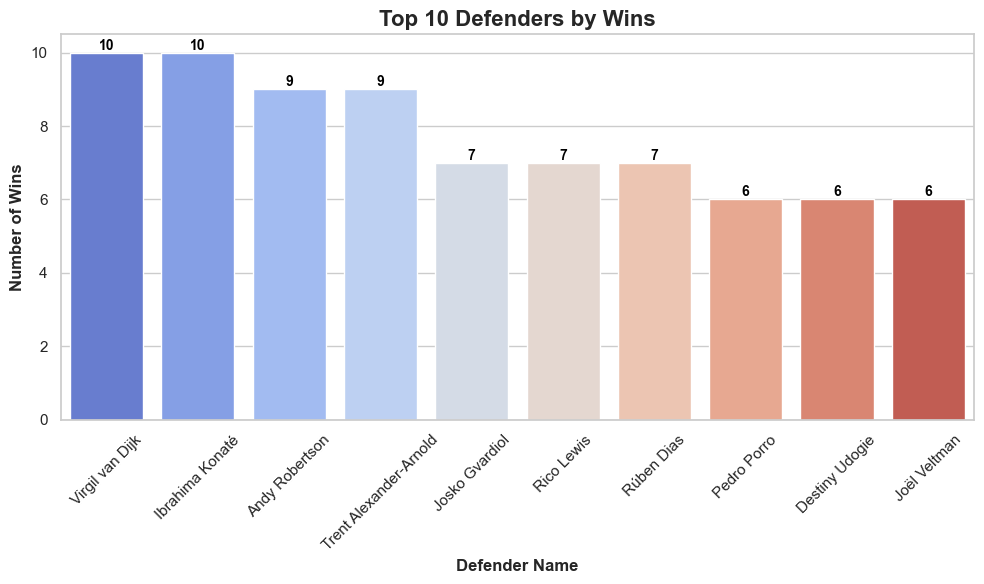

In [27]:
top_10 = df_defender[['Name', 'Wins']].sort_values(by='Wins', ascending=False).head(10)
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10, x='Name', y='Wins', palette='coolwarm')

ax.set_title('Top 10 Defenders by Wins', fontsize=16, weight='bold')
ax.set_xlabel('Defender Name', fontsize=12, weight='bold')
ax.set_ylabel('Number of Wins', fontsize=12, weight='bold')

# Xoay nhãn trục X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Ghi giá trị lên đỉnh các cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Tăng khoảng cách giữa nhãn và trục
plt.tight_layout()

plt.show()

Top 10 cầu thủ chặn bóng thành công nhất

In [28]:
df_defender['Tackle success %']

275    71%
183    70%
203    50%
89     50%
248    56%
      ... 
316     0%
280     0%
90      0%
21      0%
22      0%
Name: Tackle success %, Length: 185, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Daniel Muñoz - Crystal Palace'),
  Text(1, 0, 'Trent Alexander-Arnold - Liverpool'),
  Text(2, 0, 'Tyrick Mitchell - Crystal Palace'),
  Text(3, 0, 'Cristian Romero - Tottenham Hotspur'),
  Text(4, 0, 'Noussair Mazraoui - Manchester United'),
  Text(5, 0, 'Kenny Tete - Fulham'),
  Text(6, 0, 'Diogo Dalot - Manchester United'),
  Text(7, 0, 'William Saliba - Arsenal'),
  Text(8, 0, 'Marcos Senesi - Bournemouth'),
  Text(9, 0, 'Destiny Udogie - Tottenham Hotspur')])

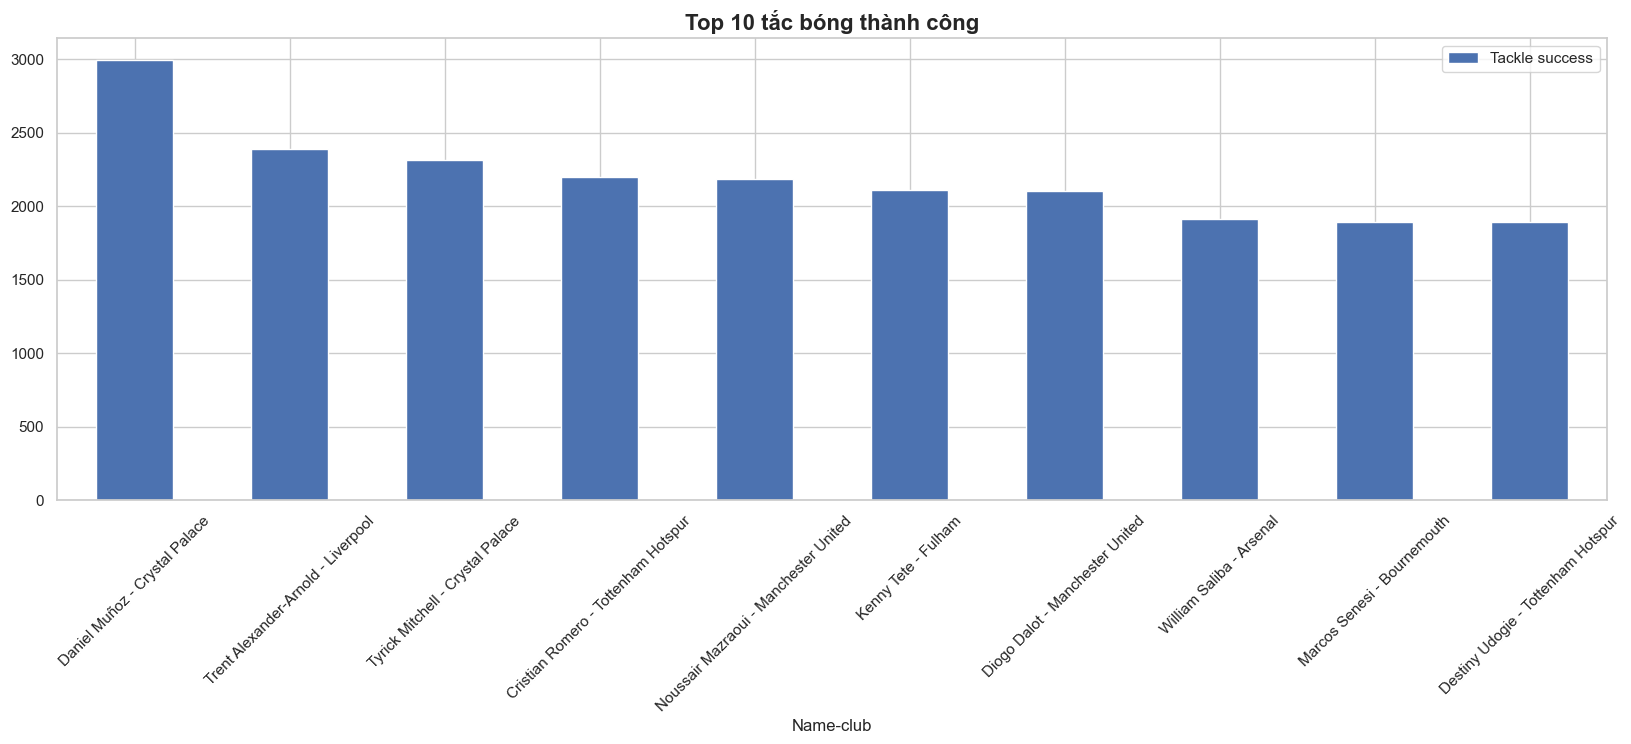

In [29]:
df_defender['Tackle success'] = df_defender['Tackle success %'].astype(str).str.replace('%', '').astype(float)*df_defender['Tackles']
df_defender['Name-club'] = df_defender['Name'] + ' - ' + df_defender['Club']
top_10 = df_defender[['Name-club', 'Tackle success']].sort_values(by='Tackle success', ascending=False).head(10)
top_10.plot(kind='bar', figsize=(20,6), y='Tackle success' , x='Name-club' )
plt.title('Top 10 tắc bóng thành công', fontsize=16, weight='bold')
plt.xticks(rotation=45)


Top 10 các cầu thủ chuyền bóng nhiều nhất

In [30]:
top10 = df_defender[['Name', 'Passes']].sort_values(by='Passes', ascending=False).head(10)
top10

,Name,Passes
300,Virgil van Dijk,1008
124,Jan Bednarek,944
275,Taylor Harwood-Bellis,891
55,Cristian Romero,869
180,Levi Colwill,861
150,Josko Gvardiol,830
201,Manuel Akanji,795
261,Rúben Dias,784
41,Calvin Bassey,769
104,Ibrahima Konaté,741


In [31]:
df_defender.to_csv('../../data/Stats_csv/Processed_Defender_data.csv',index=False) 